# Vorbereitung

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.odr as odr
import sympy

plt.rcParams.update(
    {
        "figure.dpi": 200,
        "figure.figsize": (7, 4),
        "font.family": "serif",
        "mathtext.fontset": "cm",
        "axes.grid": True,
        "axes.labelsize": 12,
        "grid.linewidth": 0.2,
        "grid.alpha": 0.5,
        "lines.linewidth": 0.7,
        "lines.dashed_pattern": (6, 4),
    }
)

# Daten einlesen

- Verschiedene Datensätze: Kommagetrennt, Komma als Dezimalpunkt
- Excel Import?

In [30]:
data = pd.read_csv("test_data.csv")

t, x, x_err = data.T.values

In [27]:
sin_x = unp.sin(data.x)

plt.plot(unp.uarray(data.x).n, sin_x.n, ".")

C:\Users\carlo\AppData\Local\Temp\ipykernel_12856\4005698766.py:3: UserWarning: Obsolete: uarray() should now be called with two arguments. Code can be automatically updated with python -m uncertainties.1to2 -w ProgramDirectory.
  plt.plot(unp.uarray(data.x).n, sin_x.n, ".")


ValueError: too many values to unpack (expected 2)

In [32]:
x_un = unp.uarray(data.x, data.x_err)

data["x_un"] = x_un
data

,t,x,x_err,x_un
0,0.000000,0.003529,0.127406,0.00+/-0.13
1,0.010101,0.096066,0.136932,0.10+/-0.14
2,0.020202,0.139047,0.127071,0.14+/-0.13
3,0.030303,0.192188,0.101231,0.19+/-0.10
4,0.040404,0.215363,0.103414,0.22+/-0.10
...,...,...,...,...
95,0.959596,-0.988619,0.149841,-0.99+/-0.15
96,0.969697,-0.948150,0.137767,-0.95+/-0.14
97,0.979798,-0.963051,0.145300,-0.96+/-0.15
98,0.989899,-0.970999,0.117125,-0.97+/-0.12


# Daten visualisieren

Text(0, 0.5, '$x \\:\\mathrm{[m]}$')

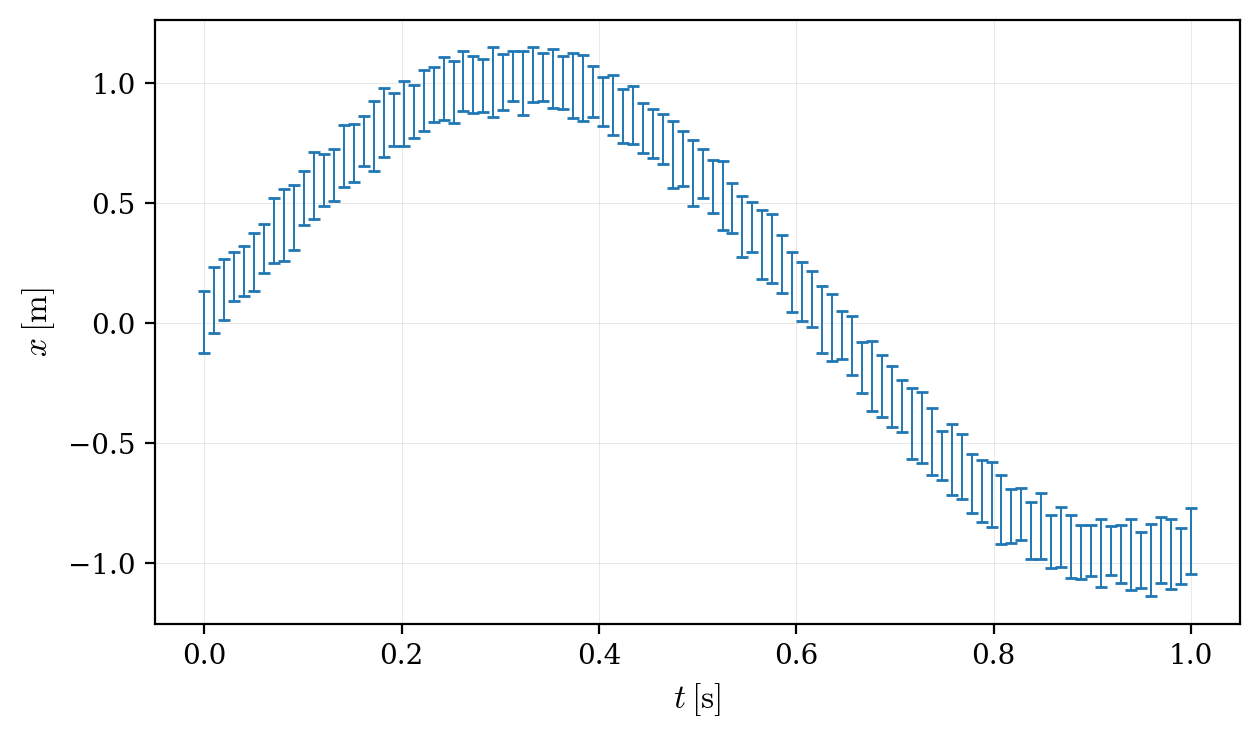

In [9]:
plt.errorbar(data.t, data.x, yerr=data.x_err, fmt=" ", capsize=2)
plt.xlabel("$t \\:\\mathrm{[s]}$")
plt.ylabel("$x \\:\\mathrm{[m]}$")

# Modell anpassen

# Export

In [58]:
data.to_latex("export.tex", formatters={"x_un": "{:.2uL}".format}, escape=False, index=False)